#### IMPORTS AND VIEWING DATASETS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HCV.csv')
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [3]:
dfd = pd.read_csv('Discretization.csv')
dfd

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


#### SUPPORTING FUNCTIONS FOR DISCRETIZATION

##### The unique function gives a list of all unique elements in a list

In [4]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

##### The breaks function gives the discretized break points to each of the given attributes

In [5]:
def breaks(a):
    if a in [0,2,11,12,14,15,16,17,18,19,20,21]:
        my_list = dfd['Discretization (Items)'][a].split(";")
        removetable = str.maketrans('', '', "'[]'")
        a = [s.translate(removetable) for s in my_list]
        k=l=[0]*15
        for i in range(0,len(a)):
            if ":" not in a[i]:
                k[i] = a[i].split(",")
                l[i] = int(k[i][0])
                l.sort()
        return unique(l)
    elif a in [1,3,4,5,6,7,8,9,10]:
        my_list = dfd['Feature Values'][a].split(",")
        return my_list
    elif a == 13:
        return [0,2,12,17,20]
    elif a in [22,23,24,25,26]:
        return [0,5,808450,1201715,3731527]
    else:
        my_list = dfd['Discretization (Items)'][a].split(",")
        removetable = str.maketrans('', '', " '[]-'")
        a = [s.translate(removetable) for s in my_list]
        return a

##### The ranger function gives the range in which the value of the given attribute falls in

In [6]:
def ranger(a,t):
    for i in range(0, len(t)):
        if (a > t[i] and t[i] == max(t)):
            x = t[i-1]
            y = t[i]
        elif (a > t[i] and t[i] != max(t)):
            x = t[i]
            y = t[i+1]
    return x,y    

#### DRIVER FUNCTION FOR DISCRETIZATION

In [8]:
from itertools import repeat
d = [[] for i in repeat(None, 30)]

for j in list(df.iloc[:,0]):
    if j<62:
        d[0].append(list(ranger(j, breaks(0))))
    else:
        d[0].append([0,0])

for i in [2,22,23,24,25,26]:
    for j in list(df.iloc[:,i]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [11,12,14,15,16,17,18,19,20,21]:
    for j in list(df.iloc[:,i-1]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [1,3,4,5,6,7]:
    for j in list(df.iloc[:,i]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")

for i in [9,10]:
    for j in list(df.iloc[:,i-1]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")            


for j in list(df.iloc[:,12]):
    d[13].append(ranger(j, breaks(13)))

for j in list(df.iloc[:,28]):
    if j == 1:
        d[28].append(breaks(28)[1])
    elif j == 2:
        d[28].append(breaks(28)[2])
    elif j == 3:
        d[28].append(breaks(28)[3])
    else:
        d[28].append(breaks(28)[4])

d[27] = df.iloc[:,27]

for j in list(df.iloc[:,21]):
    d[29].append(list(ranger(j, breaks(21))))
    
d.remove(d[8])

##### Dataset classified obtained using Discretization parameters in the supporting file

In [9]:
df_final = pd.DataFrame(np.array(d).T.tolist(), columns = ['Age',
 'Gender',
 'BMI',
 'Fever',
 'Nausea/Vomting',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Jaundice ',
 'Epigastric pain ',
 'WBC',
 'RBC',
 'HGB',
 'Plat',
 'AST 1',
 'ALT 1',
 'ALT4',
 'ALT 12',
 'ALT 24',
 'ALT 36',
 'ALT 48',
 'RNA Base',
 'RNA 4',
 'RNA 12',
 'RNA EOT',
 'RNA EF',
 'Baseline histological Grading',
 'Baselinehistological staging',
 'ALT after 24 w'])
df_final.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,"[30, 35]",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[5, 808450]","[0, 5]","[0, 5]",13,Staging(ClassLabel)FewSepta,"[0, 20]"
1,"[42, 47]",Male,"[25, 30]",Absent,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[40, 128]"
2,"[52, 57]",Male,"[30, 35]",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[0, 5]","[5, 808450]","[5, 808450]",4,Cirrhosis,"[0, 20]"
3,"[47, 52]",Female,"[30, 35]",Absent,Present,Absent,Present,Absent,Present,Absent,...,"[40, 128]","[40, 128]","[808450, 1201715]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",10,ManySepta,"[20, 40]"
4,"[57, 62]",Male,"[30, 35]",Absent,Absent,Present,Absent,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[1201715, 3731527]","[5, 808450]","[5, 808450]",11,PortalFibrosis,"[20, 40]"


In [11]:
df_final.to_csv("k.csv", index=False)

### PHASE 2 (Delivery 3)

#### Further operations on the data for better understanding

In [12]:
k=pd.read_csv("k.csv")
k.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,"[30, 35]",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[5, 808450]","[0, 5]","[0, 5]",13,Staging(ClassLabel)FewSepta,"[0, 20]"
1,"[42, 47]",Male,"[25, 30]",Absent,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[40, 128]"
2,"[52, 57]",Male,"[30, 35]",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[0, 5]","[5, 808450]","[5, 808450]",4,Cirrhosis,"[0, 20]"
3,"[47, 52]",Female,"[30, 35]",Absent,Present,Absent,Present,Absent,Present,Absent,...,"[40, 128]","[40, 128]","[808450, 1201715]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",10,ManySepta,"[20, 40]"
4,"[57, 62]",Male,"[30, 35]",Absent,Absent,Present,Absent,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[1201715, 3731527]","[5, 808450]","[5, 808450]",11,PortalFibrosis,"[20, 40]"


In [13]:
for i in list(k.columns):
    print(i, ":", type(k[i][0]))

Age : <class 'str'>
Gender : <class 'str'>
BMI : <class 'str'>
Fever : <class 'str'>
Nausea/Vomting : <class 'str'>
Headache  : <class 'str'>
Diarrhea  : <class 'str'>
Fatigue & generalized bone ache  : <class 'str'>
Jaundice  : <class 'str'>
Epigastric pain  : <class 'str'>
WBC : <class 'str'>
RBC : <class 'str'>
HGB : <class 'str'>
Plat : <class 'str'>
AST 1 : <class 'str'>
ALT 1 : <class 'str'>
ALT4 : <class 'str'>
ALT 12 : <class 'str'>
ALT 24 : <class 'str'>
ALT 36 : <class 'str'>
ALT 48 : <class 'str'>
RNA Base : <class 'str'>
RNA 4 : <class 'str'>
RNA 12 : <class 'str'>
RNA EOT : <class 'str'>
RNA EF : <class 'str'>
Baseline histological Grading : <class 'numpy.int64'>
Baselinehistological staging : <class 'str'>
ALT after 24 w : <class 'str'>


#### INTERESTING OBSERVATION
#### When I read the file again, all the list datatypes have converted into string type. This is because Excel does not have the capability to save list type data points and has stored them as character variables instead.

#### Checking all the unique data points after discretization

In [14]:
for i in k.columns:
    print(i, ":", k[i].unique())

Age : ['[52, 57]' '[42, 47]' '[47, 52]' '[57, 62]' '[37, 42]' '[32, 37]'
 '[0, 32]']
Gender : ['Male' 'Female']
BMI : ['[30, 35]' '[25, 30]' '[0, 25]']
Fever : [' Present' 'Absent']
Nausea/Vomting : ['Absent' ' Present']
Headache  : ['Absent' ' Present']
Diarrhea  : ['Absent' ' Present']
Fatigue & generalized bone ache  : [' Present' 'Absent']
Jaundice  : [' Present' 'Absent']
Epigastric pain  : [' Present' 'Absent']
WBC : ['[4000, 11000]' '[11000, 12101]' '[0, 4000]']
RBC : ['[3000000, 5000000]' '[5000000, 5018451]']
HGB : ['(12, 17)' '(2, 12)']
Plat : ['[100000, 226465]' '[93013, 100000]' '[0, 93013]']
AST 1 : ['[40, 128]' '[20, 40]']
ALT 1 : ['[40, 128]' '[20, 40]']
ALT4 : ['[40, 128]' '[20, 40]']
ALT 12 : ['[40, 128]' '[20, 40]']
ALT 24 : ['[40, 128]' '[20, 40]']
ALT 36 : ['[0, 20]' '[40, 128]' '[20, 40]']
ALT 48 : ['[0, 20]' '[40, 128]' '[20, 40]']
RNA Base : ['[5, 808450]' '[808450, 1201715]']
RNA 4 : ['[5, 808450]' '[808450, 1201715]' '[0, 5]']
RNA 12 : ['[5, 808450]' '[0, 5]' '

#### Converting all the test result ranges to understandable English terms with internet research.

In [15]:
k["BMI"] = np.where(k['BMI'] == '[0, 25]', 'Normal', k['BMI'])
k["BMI"] = np.where(k['BMI'] == '[25, 30]', 'Obese', k['BMI'])
k["BMI"] = np.where(k['BMI'] == '[30, 35]', 'Overwheight', k['BMI'])

k["WBC"] = np.where(k['WBC'] == '[0, 4000]', 'Low', k['WBC'])
k["WBC"] = np.where(k['WBC'] == '[4000, 11000]', 'Normal', k['WBC'])
k["WBC"] = np.where(k['WBC'] == '[11000, 12101]', 'High', k['WBC'])

k["RBC"] = np.where(k['RBC'] == '[3000000, 5000000]', 'Normal', k['RBC'])
k["RBC"] = np.where(k['RBC'] == '[5000000, 5018451]', 'Elevated', k['RBC'])

k["HGB"] = np.where(k['HGB'] == '(2, 12)', 'Low', k['HGB'])
k["HGB"] = np.where(k['HGB'] == '(12, 17)', 'Normal', k['HGB'])

k["Plat"] = np.where(k['Plat'] == '[0, 93013]', 'Extremely Low', k['Plat'])
k["Plat"] = np.where(k['Plat'] == '[93013, 100000]', 'Low', k['Plat'])
k["Plat"] = np.where(k['Plat'] == '[100000, 226465]', 'Normal', k['Plat'])

k["AST 1"] = np.where(k["AST 1"] == '[20, 40]', 'Normal', k["AST 1"])
k["AST 1"] = np.where(k["AST 1"] == '[40, 128]', 'Elevated', k["AST 1"])

k["ALT 1"] = np.where(k["ALT 1"] == '[20, 40]', 'Normal', k["ALT 1"])
k["ALT 1"] = np.where(k["ALT 1"] == '[40, 128]', 'Elevated', k["AST 1"])

k["ALT4"] = np.where(k["ALT4"] == '[20, 40]', 'Normal', k["ALT4"])
k["ALT4"] = np.where(k["ALT4"] == '[40, 128]', 'Elevated', k["ALT4"])

k["ALT 12"] = np.where(k["ALT 12"] == '[20, 40]', 'Normal', k["ALT 12"])
k["ALT 12"] = np.where(k["ALT 12"] == '[40, 128]', 'Elevated', k["ALT 12"])

k["ALT 24"] = np.where(k["ALT 24"] == '[20, 40]', 'Normal', k["ALT 24"])
k["ALT 24"] = np.where(k["ALT 24"] == '[40, 128]', 'Elevated', k["ALT 24"])

k["ALT 36"] = np.where(k["ALT 36"] == '[0, 20]', 'Low', k["ALT 36"])
k["ALT 36"] = np.where(k["ALT 36"] == '[20, 40]', 'Normal', k["ALT 36"])
k["ALT 36"] = np.where(k["ALT 36"] == '[40, 128]', 'Elevated', k["ALT 36"])

k["ALT 48"] = np.where(k["ALT 48"] == '[0, 20]', 'Low', k["ALT 48"])
k["ALT 48"] = np.where(k["ALT 48"] == '[20, 40]', 'Normal', k["ALT 48"])
k["ALT 48"] = np.where(k["ALT 48"] == '[40, 128]', 'Elevated', k["ALT 48"])

k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[0, 20]', 'Low', k["ALT after 24 w"])
k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[20, 40]', 'Normal', k["ALT after 24 w"])
k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[40, 128]', 'Elevated', k["ALT after 24 w"])

k["RNA Base"] = np.where(k["RNA Base"] == '[0, 5]', "No Virus", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[5, 808450]', "Low", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[808450, 1201715]', "High", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[1201715, 3731527]', "Extremely High", k["RNA Base"])

k["RNA 4"] = np.where(k["RNA 4"] == '[0, 5]', "No Virus", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[5, 808450]', "Low", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[808450, 1201715]', "High", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[1201715, 3731527]', "Extremely High", k["RNA 4"])

k["RNA 12"] = np.where(k["RNA 12"] == '[0, 5]', "No Virus", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[5, 808450]', "Low", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[808450, 1201715]', "High", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[1201715, 3731527]', "Extremely High", k["RNA 12"])

k["RNA EOT"] = np.where(k["RNA EOT"] == '[0, 5]', "No Virus", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[5, 808450]', "Low", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[808450, 1201715]', "High", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[1201715, 3731527]', "Extremely High", k["RNA EOT"])

k["RNA EF"] = np.where(k["RNA EF"] == '[0, 5]', "No Virus", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[5, 808450]', "Low", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[808450, 1201715]', "High", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[1201715, 3731527]', "Extremely High", k["RNA EF"])



In [16]:
k["Baselinehistological staging"] = np.where(k["Baselinehistological staging"] == "Staging(ClassLabel)FewSepta", "Few Septa", k["Baselinehistological staging"])

In [17]:
k.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,Overwheight,Present,Absent,Absent,Absent,Present,Present,Present,...,Low,Low,Low,Low,Low,No Virus,No Virus,13,Few Septa,Low
1,"[42, 47]",Male,Obese,Absent,Present,Present,Absent,Present,Present,Absent,...,Elevated,Elevated,Low,Low,Low,Low,Low,4,Few Septa,Elevated
2,"[52, 57]",Male,Overwheight,Present,Present,Present,Present,Absent,Absent,Absent,...,Low,Low,Low,Low,No Virus,Low,Low,4,Cirrhosis,Low
3,"[47, 52]",Female,Overwheight,Absent,Present,Absent,Present,Absent,Present,Absent,...,Elevated,Elevated,High,Low,Low,Low,Low,10,ManySepta,Normal
4,"[57, 62]",Male,Overwheight,Absent,Absent,Present,Absent,Present,Present,Present,...,Elevated,Elevated,Low,Low,Extremely High,Low,Low,11,PortalFibrosis,Normal


In [18]:
k.to_csv("disc2.csv", index=False)

#### VISUALIZATIONS AND OBSERVATIONS

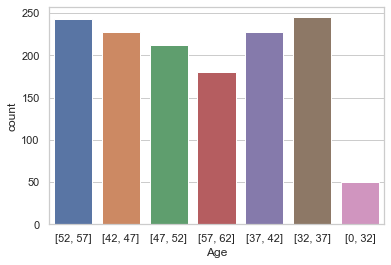

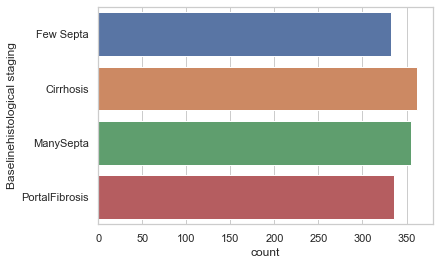

In [20]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='Age', data = k)
plt.show()

sns.countplot(y = "Baselinehistological staging", data = k)
plt.show()

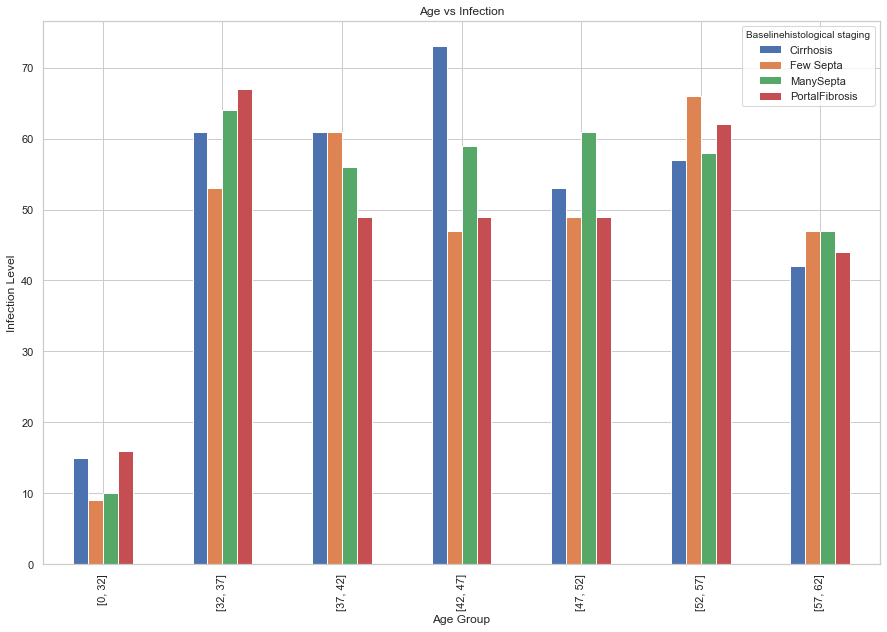

In [21]:
%matplotlib inline
pd.crosstab(k["Age"],k["Baselinehistological staging"]).plot(kind='bar', figsize = (15,10))
plt.title('Age vs Infection')
plt.xlabel('Age Group')
plt.ylabel('Infection Level')
plt.savefig('age_vs_infection')

#### OBSERVATIONS
    Cirrhosis (Advanved level of infection, the stage just before cancer) is observed mostly in the age group of 47yrs to 52yrs.

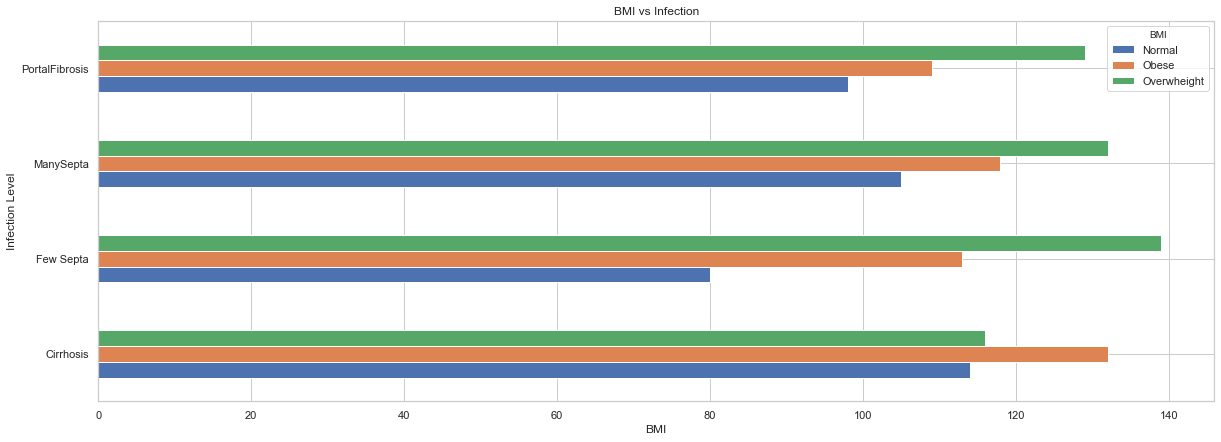

In [22]:
pd.crosstab(k["Baselinehistological staging"],k["BMI"]).plot(kind='barh', figsize = (20,7))
plt.title('BMI vs Infection')
plt.xlabel('BMI')
plt.ylabel('Infection Level')
plt.savefig('bmi_vs_infection')

#### OBSERVATIONS
    In the above chart an overall trend can be observed where Overwheight people suffer with higher infection levels. One anomaly is that Cirrhottic patients are obese more than they're overwheight. Here an assumption can be done that most of teh overwheight patients have crossed over to the cancer stage along the course of the study and were no longer part of it. 

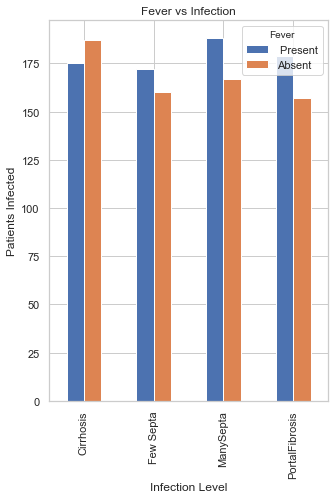

In [23]:
pd.crosstab(k["Baselinehistological staging"],k["Fever"]).plot(kind='bar', figsize = (5,7))
plt.title('Fever vs Infection')
plt.xlabel('Infection Level')
plt.ylabel('Patients Infected')
plt.savefig('Fever_vs_infection')

#### OBSERVATIONS
    This is a 50-50 case where the infection is causing the fever. A fever is generally caused when the WBC react with the virus. Another reason that causes a spike in temperature is the patients being under constant medication.

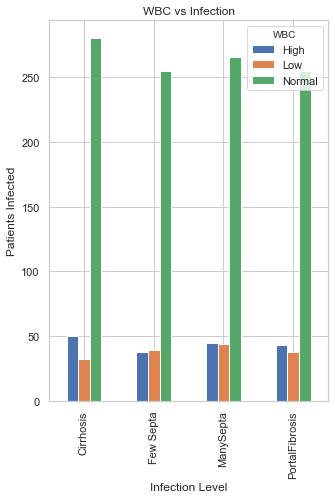

In [24]:
pd.crosstab(k["Baselinehistological staging"],k["WBC"]).plot(kind='bar', figsize = (5,7))
plt.title('WBC vs Infection')
plt.xlabel('Infection Level')
plt.ylabel('Patients Infected')
plt.savefig('WBC_vs_infection')

#### OBSERVATIONS
    1. Not much of a correlation between WBC and infected patients / infection level. Most of the patients display normal WBC levels.
    2. Resonates with the fact that WBC can't act on HCV like they do on other generic diseases and viruses.
    3. Confirms the fact that the medication caused the spike in temperature in the patients.

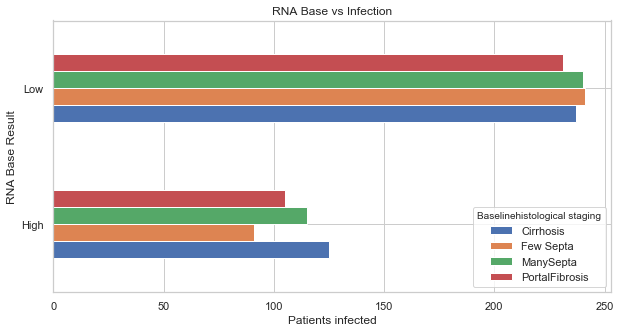

In [25]:
pd.crosstab(k["RNA Base"],k["Baselinehistological staging"]).plot(kind='barh', figsize = (10,5))
plt.title('RNA Base vs Infection')
plt.xlabel('Patients infected')
plt.ylabel('RNA Base Result')
plt.savefig('rnaBase_vs_infection')

#### PRETEXT
    The HCV RNA PCR test is a blood test that helps a doctor diagnose hepatitis C. The test measures the level of the hepatitis C virus in the bloodstream. Here, RNA Base result is the test conducted on the patients at the start of the study.
#### OBSERVATIONS
    A trend can be observed right out that most number of patients with the infection have a lower RNA Base result. But if we look closely, among people with low RNA Base result, the infection is less i.e, Few Septa and for those with higher RNA Base result, Cirrhosis is more common.

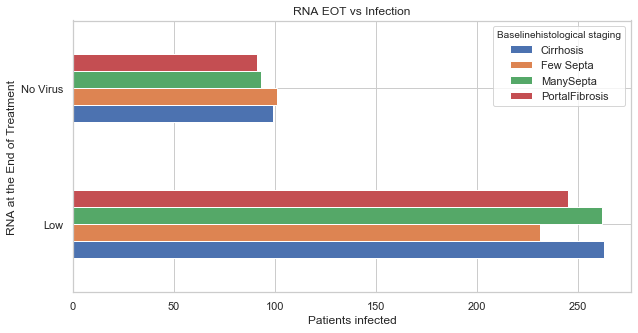

In [26]:
pd.crosstab(k["RNA EOT"],k["Baselinehistological staging"]).plot(kind='barh', figsize = (10,5))
plt.title('RNA EOT vs Infection')
plt.xlabel('Patients infected')
plt.ylabel('RNA at the End of Treatment')
plt.savefig('rnaEOT_vs_infection')

#### OBSERVATIONS
    1. When compared to  the RNA Base Result, the RNA count at the End of Treatment is much lower in the patients. 
    2. Also, start of the treatment has patients ranging from low to high RNA counts and at the end of treatment, the patients have come down to low and No virus levels with 0% with high RNA counts.